# Text Clustering and Classification

In [1]:
from datasets import load_dataset

ds = load_dataset('billingsmoore/NLLB-bo-en', split='train')['target']

ds[0]

'That is your contract with God."'

## Clustering

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
/home/j/Documents/MLotsawa/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:root:Embedding texts...


Batches:   0%|          | 0/11166 [00:00<?, ?it/s]

INFO:root:Building FAISS index...
INFO:root:Projecting with umap...
Projecting embeddings: 100%|██████████| 6/6 [01:23<00:00, 13.89s/it]
INFO:root:Clustering...


Using HDBSCAN params={'cluster_selection_method': 'leaf', 'min_cluster_size': 250, 'cluster_selection_epsilon': 0.092}


AttributeError: 'NoneType' object has no attribute 'keys'

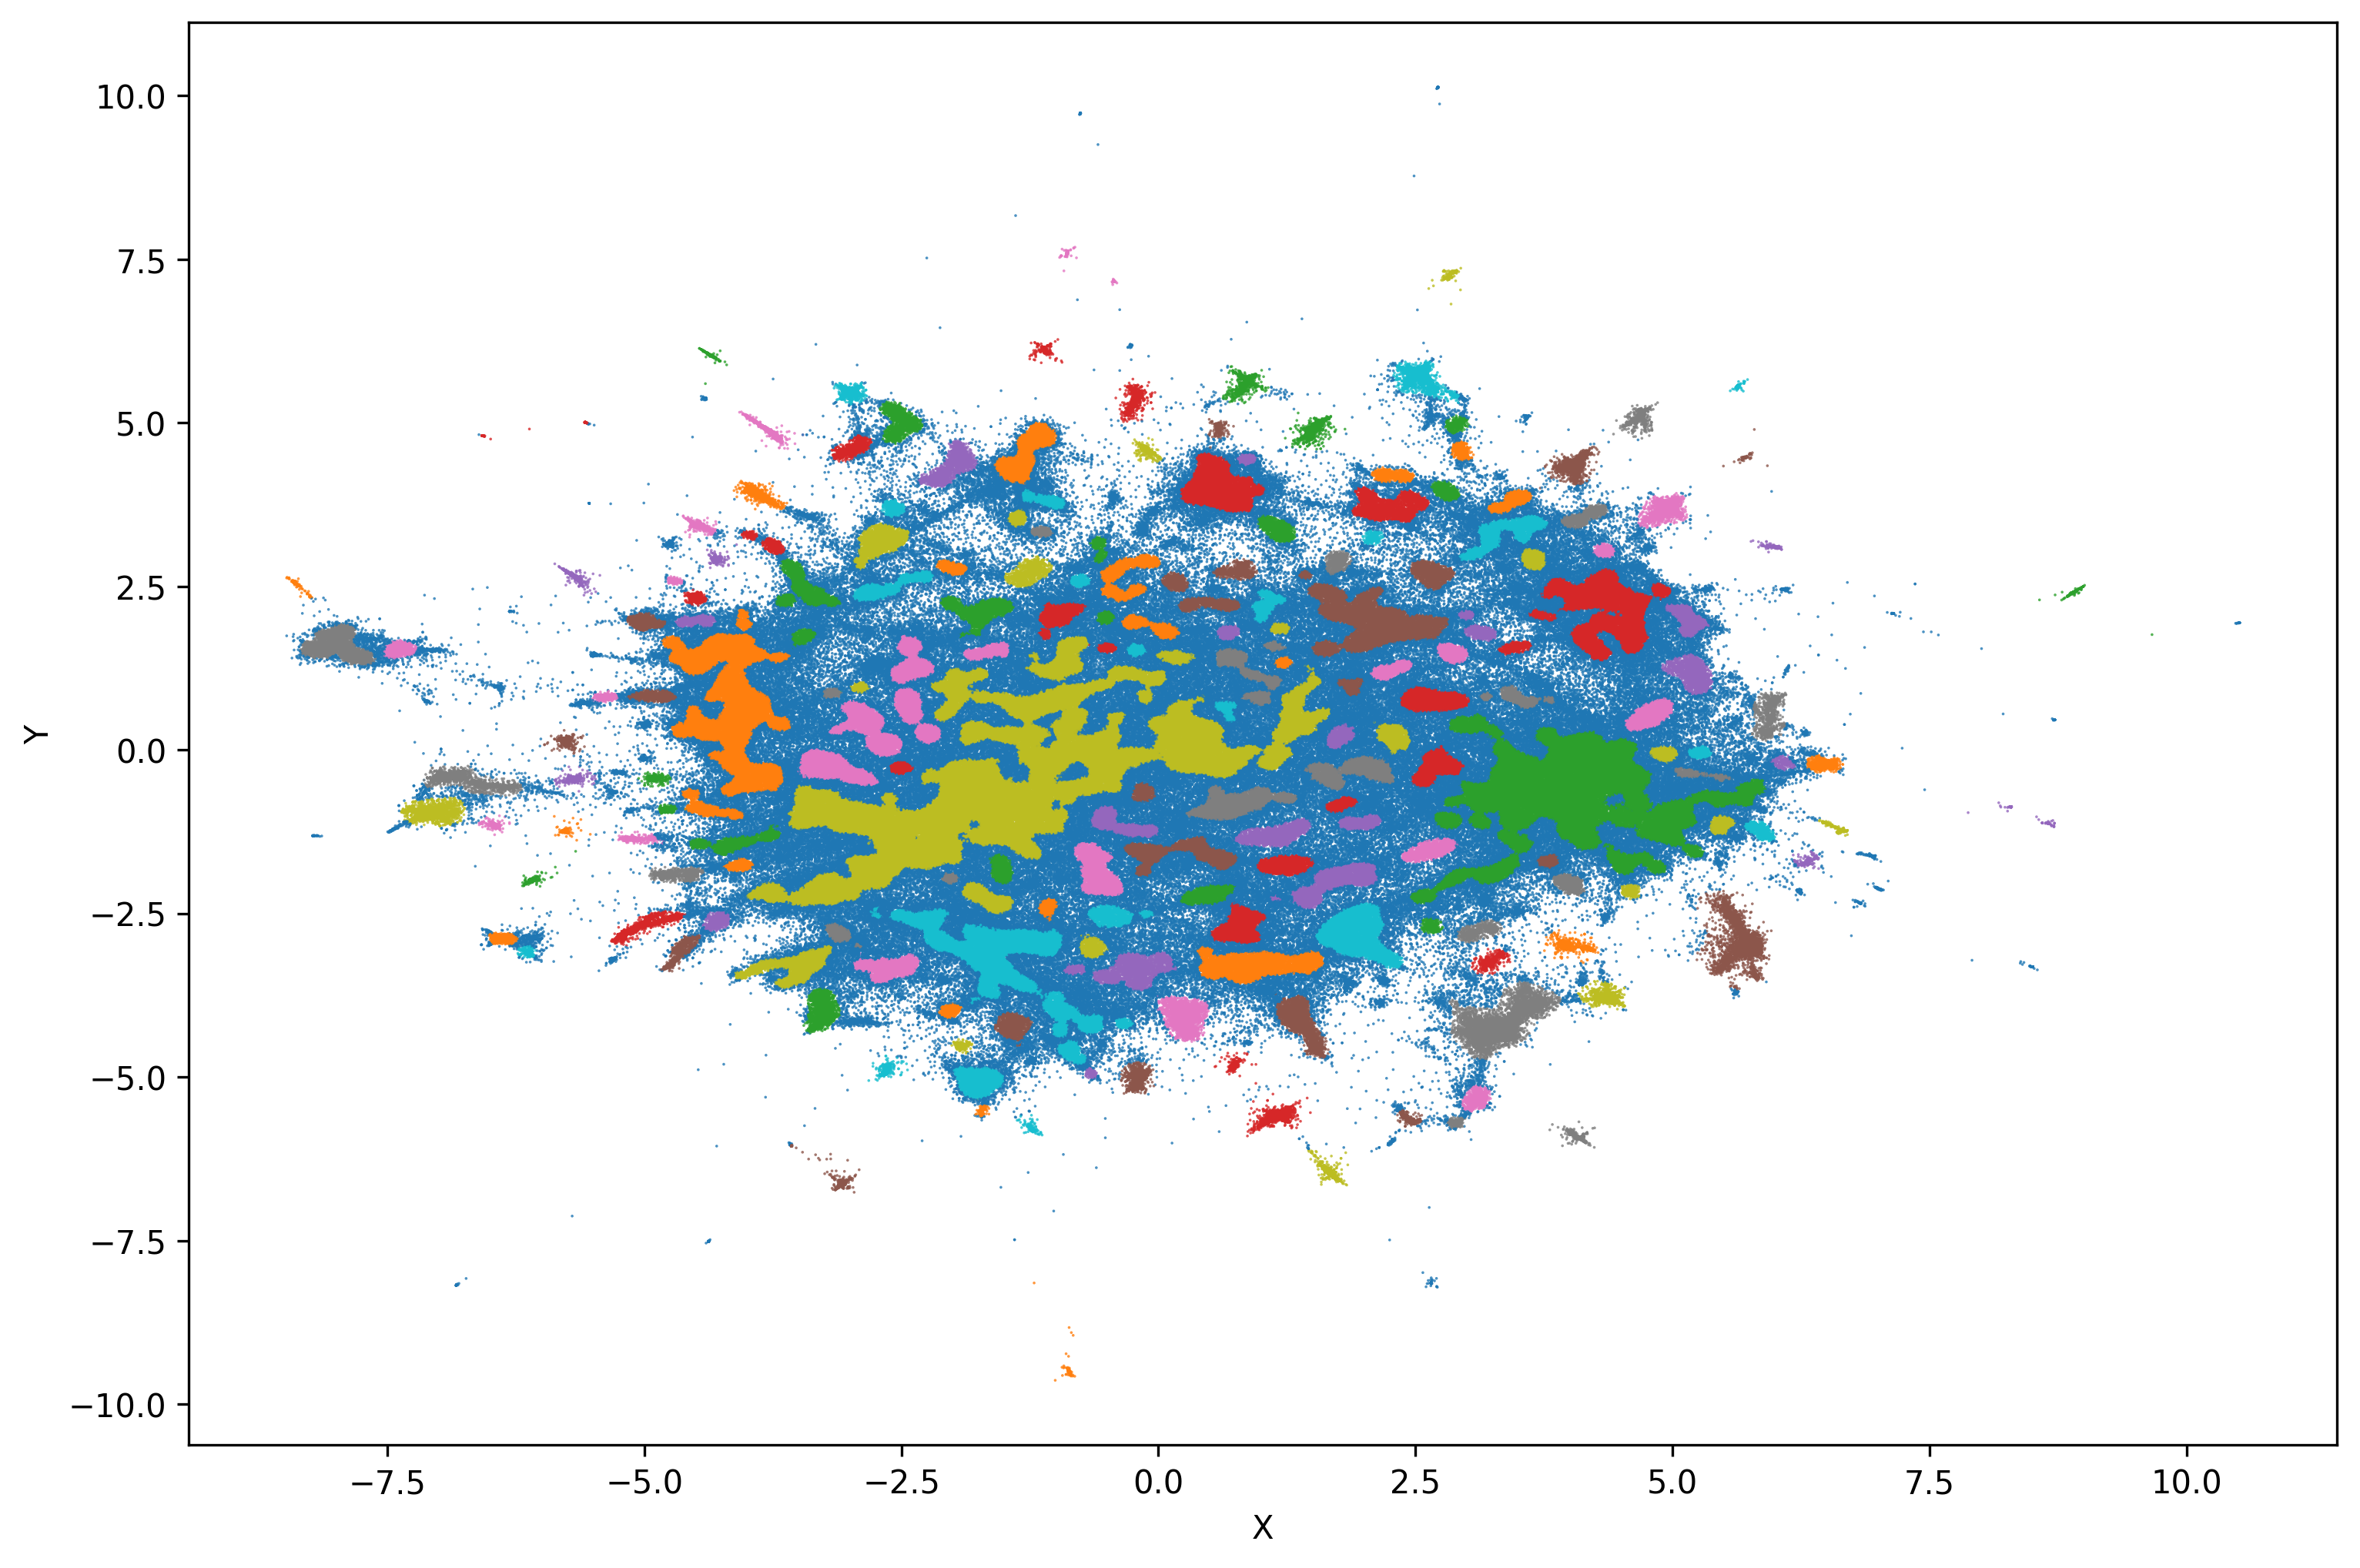

In [2]:
from easy_text_clustering.clusterer import ClusterClassifier
import pandas as pd

cc = ClusterClassifier(embed_device='cuda', summary_create=False)
cc.fit(ds,clustering_args={'cluster_selection_method': 'leaf',
 'min_cluster_size': 250,
 'cluster_selection_epsilon': 0.092})
cc.show()


INFO:root:Using precomputed embeddings...
INFO:root:Building FAISS index...
INFO:root:Using precomputed projections...
INFO:root:Clustering...


Using HDBSCAN params={'cluster_selection_method': 'leaf', 'min_cluster_size': 250, 'cluster_selection_epsilon': 0.1}


AttributeError: 'NoneType' object has no attribute 'keys'

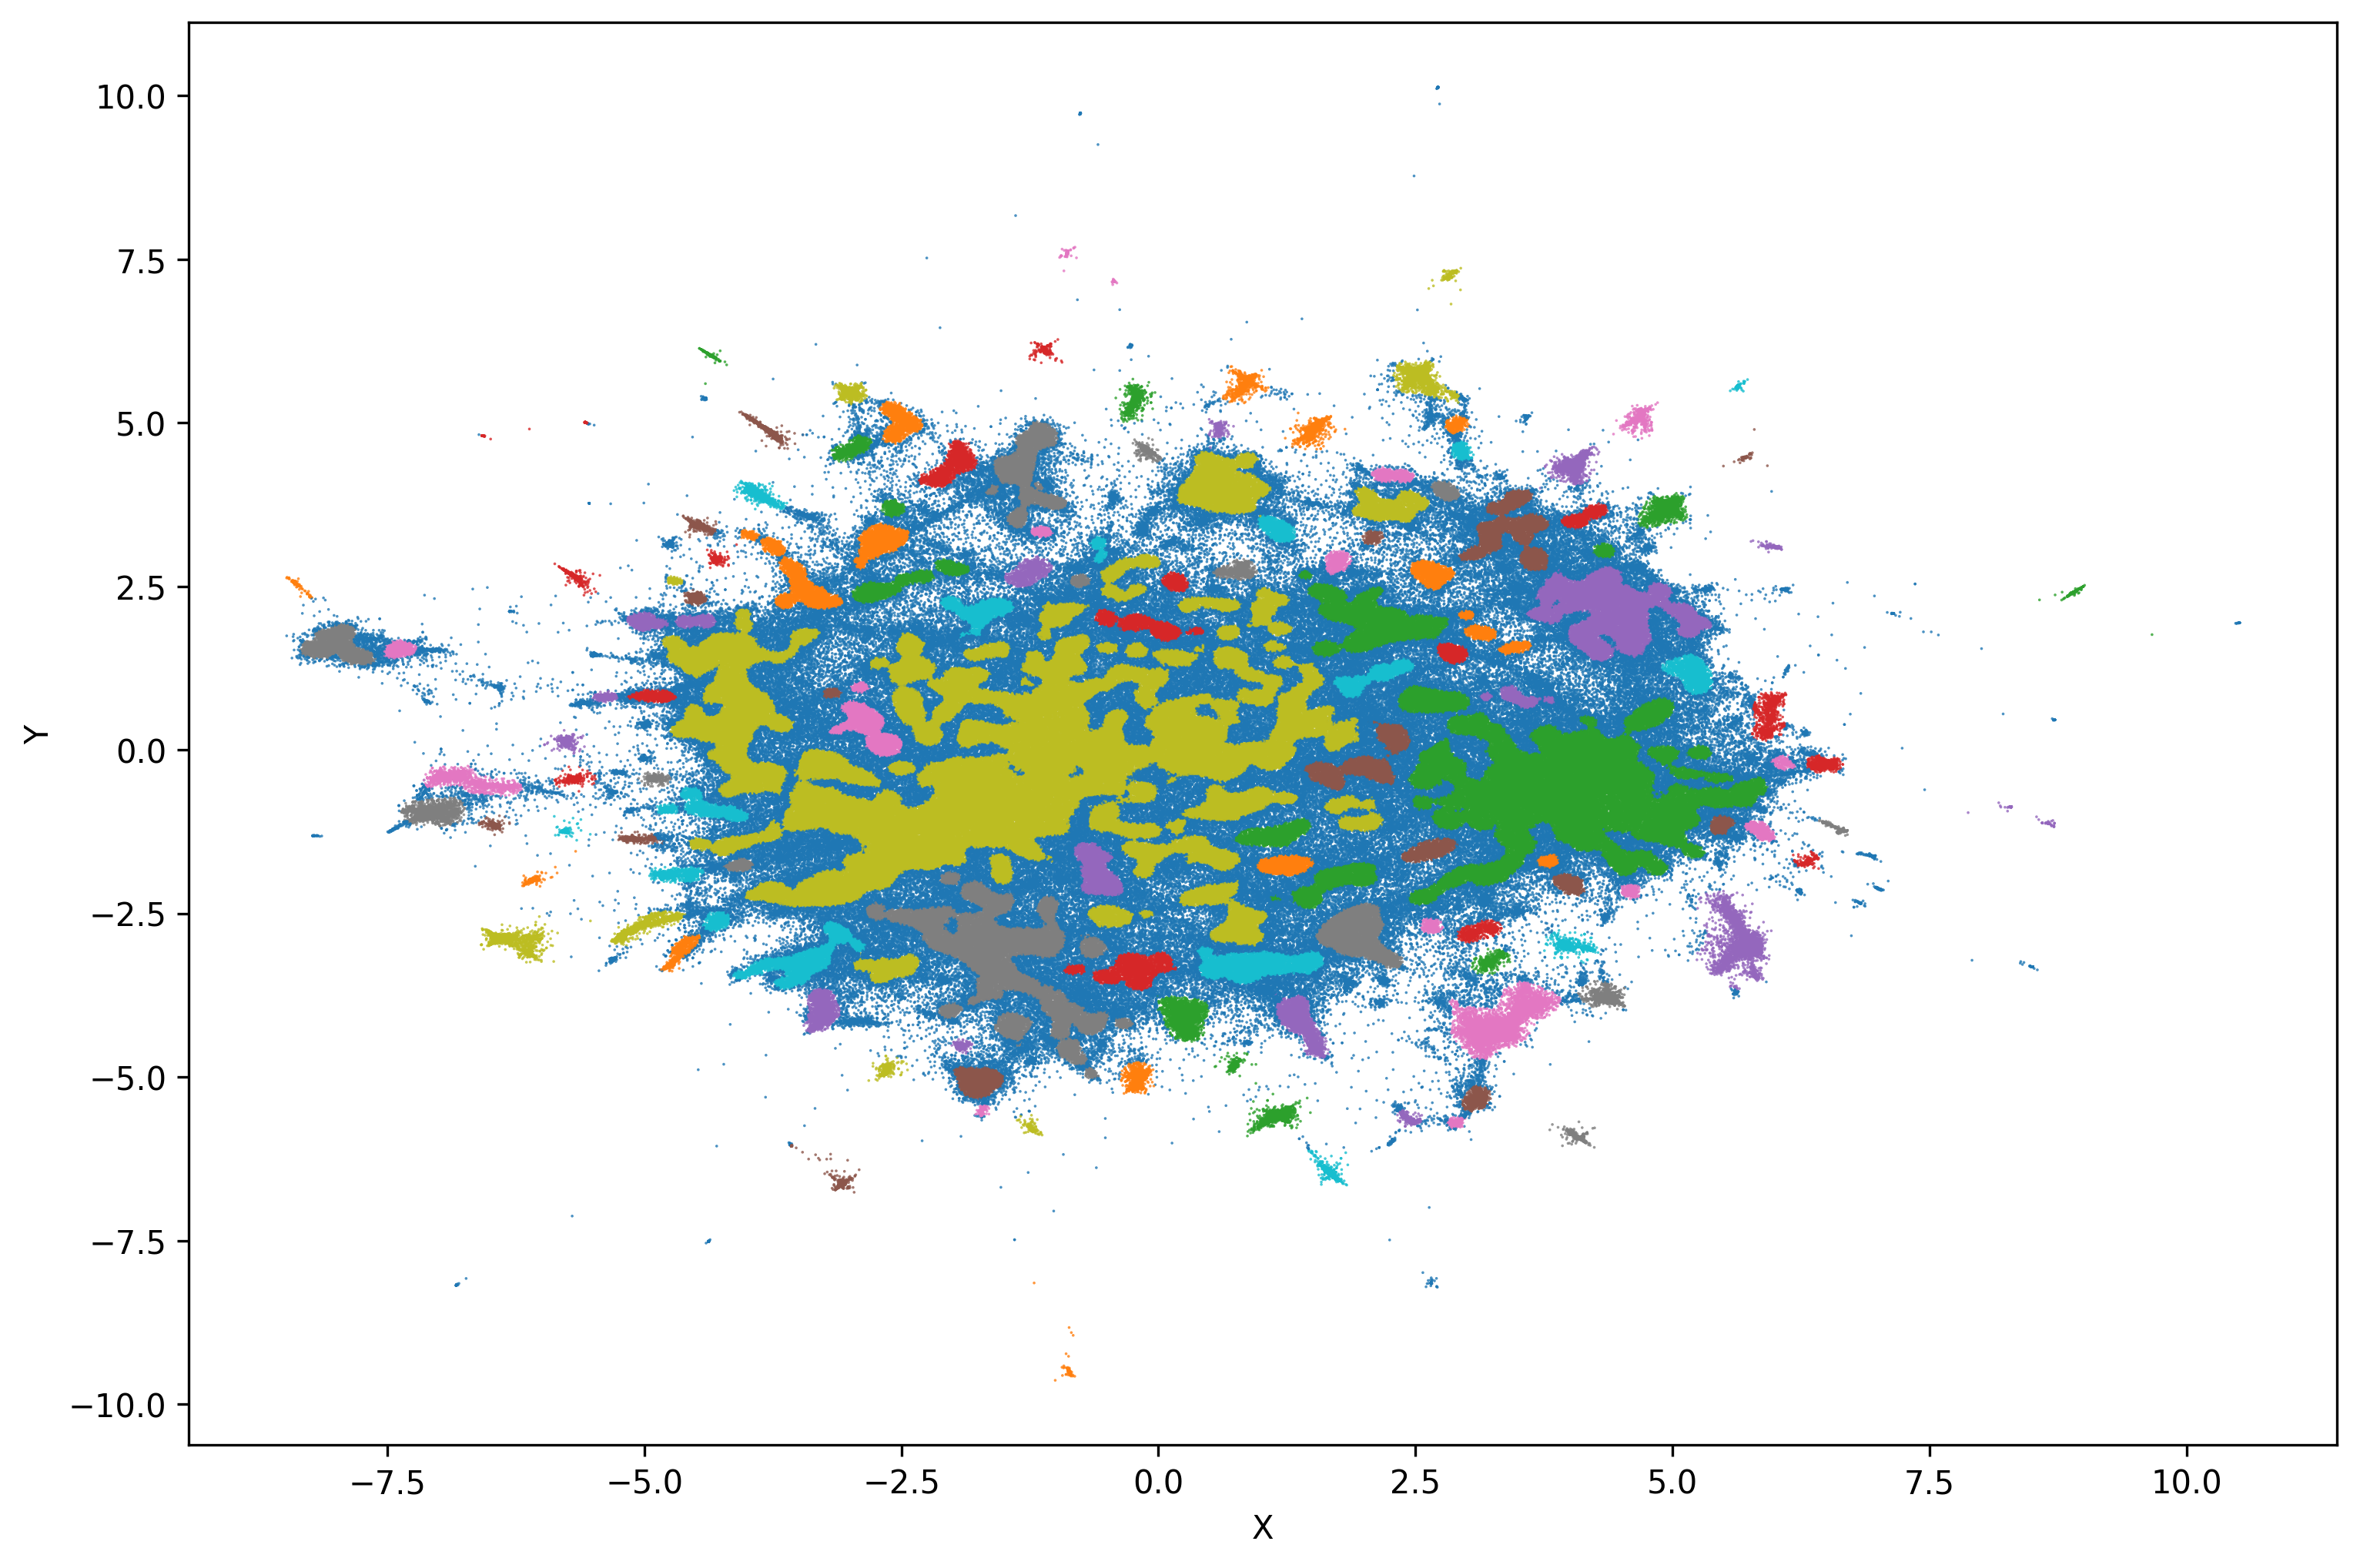

In [7]:
cc.fit(ds,clustering_args={'cluster_selection_method': 'leaf',
 'min_cluster_size': 250,
 'cluster_selection_epsilon': 0.1})
cc.show()

In [58]:
cc.save('nllb-cc-wip')

In [10]:
outlier_proj = [cc.projections[elt] for elt in cc.label2docs[-1]]

In [16]:
a = outlier_proj[0]

In [ ]:
import math

# Keep [original key, projection coords]
outlier_projs = [[elt, cc.projections[elt]] for elt in cc.label2docs[-1]]

# Precompute cluster centers (excluding the -1 key)
cluster_centers = [[key, val] for key, val in cc.cluster_centers.items() if key != -1]

# Find best label by finding the closest center
best_labels = []
for proj in outlier_projs:
    # Calculate distances to all cluster centers
    closest_label = min(cluster_centers, key=lambda center: math.dist(proj[1], center[1]))[0]
    best_labels.append([proj[0], closest_label])

# Access the first element of best_labels
best_labels[0]

[0, np.int64(129)]

In [38]:
# change labels to reflect changes
for new in best_labels:
    cc.cluster_labels[new[0]] = new[1]

# update the other features of the classifier accordingly
cc.store_cluster_info(cc.cluster_labels)

AttributeError: 'NoneType' object has no attribute 'keys'

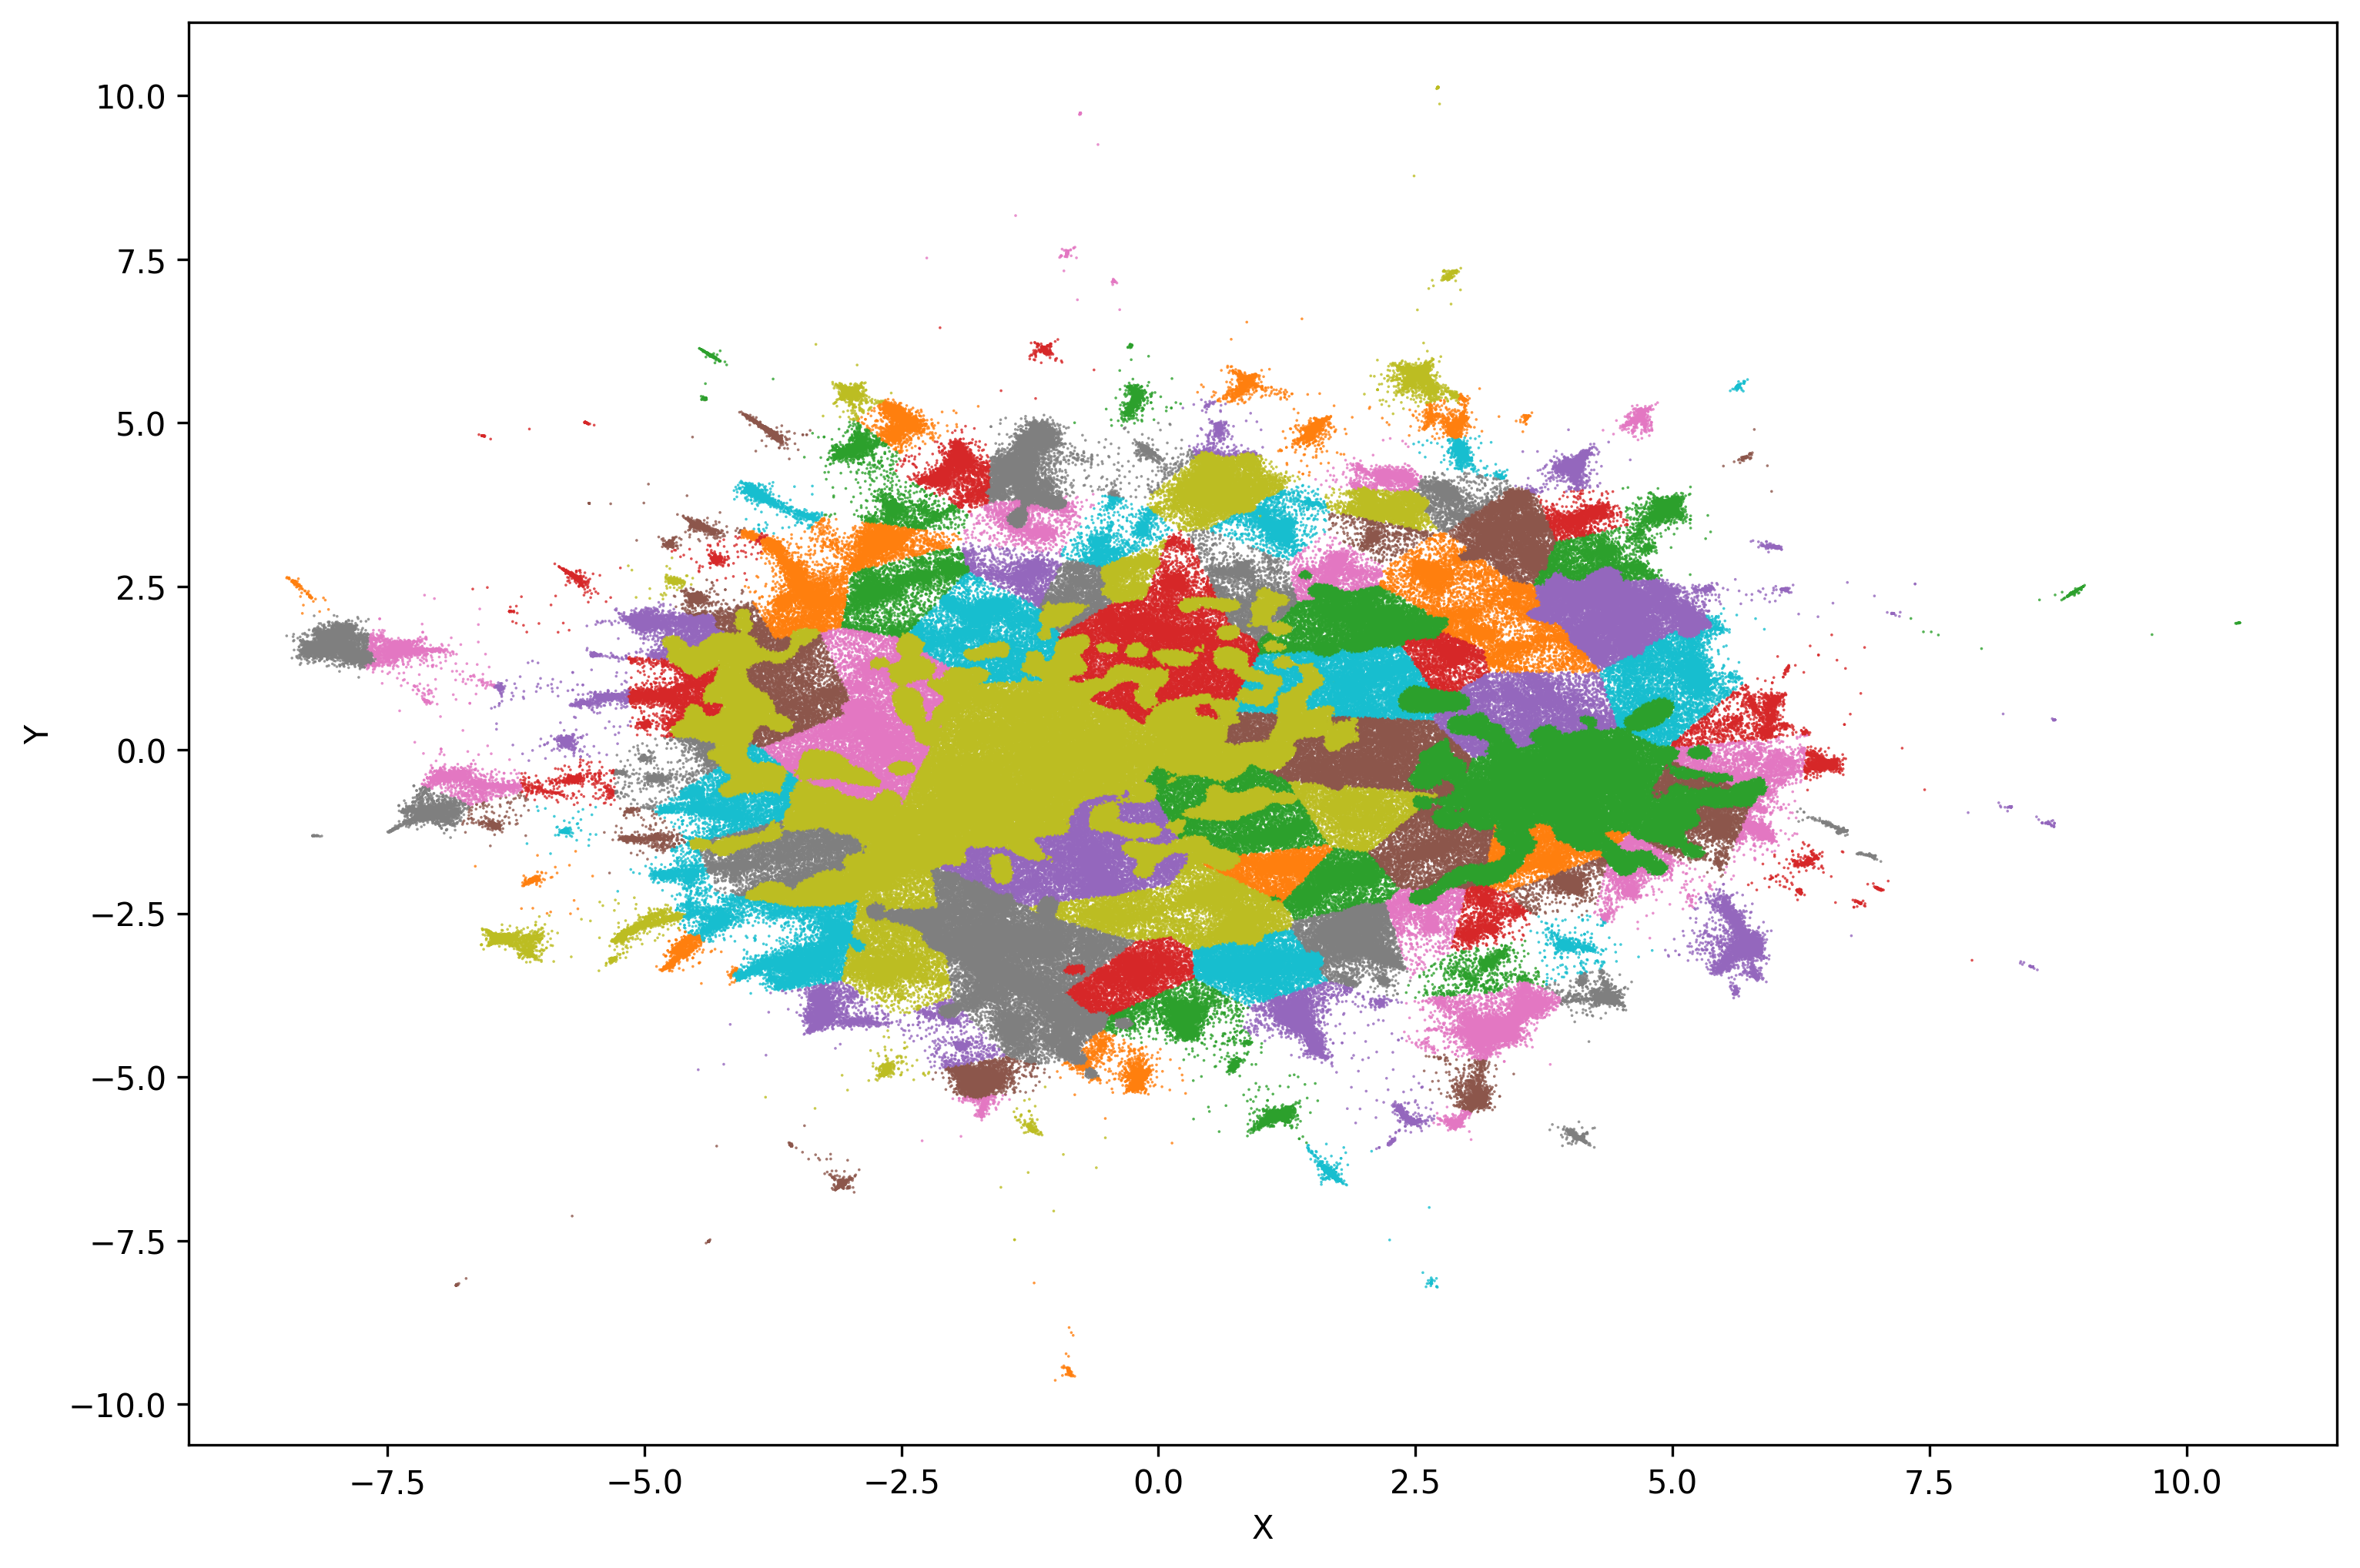

In [39]:
cc.show()

In [44]:
cc.summaries = cc.summarize(ds, cc.cluster_labels)

Request:
<s>[INST]Example 1:
And, you do not need an additional battery.

Example 2:
It does not require any battery.

Example 3:
Installing the Battery on page 24.

Example 4:
You wouldn't need extra batterys.

Example 5:
Batteries are not included (4 AA size required).

Example 6:
Extra batteries shouldn't be required.

Example 7:
No explicit battery pack is needed.

Example 8:
There is no battery needed.

Example 9:
Don't know any bigger battery.

Example 10:
No you need a battery.

Use three words total (comma separated)to describe general topics in above texts. Under no circumstances use enumeration. Example format: Tree, Cat, Fireman[/INST]
Number of clusters is 144


In [46]:
cc.cluster_summaries = cc.summaries

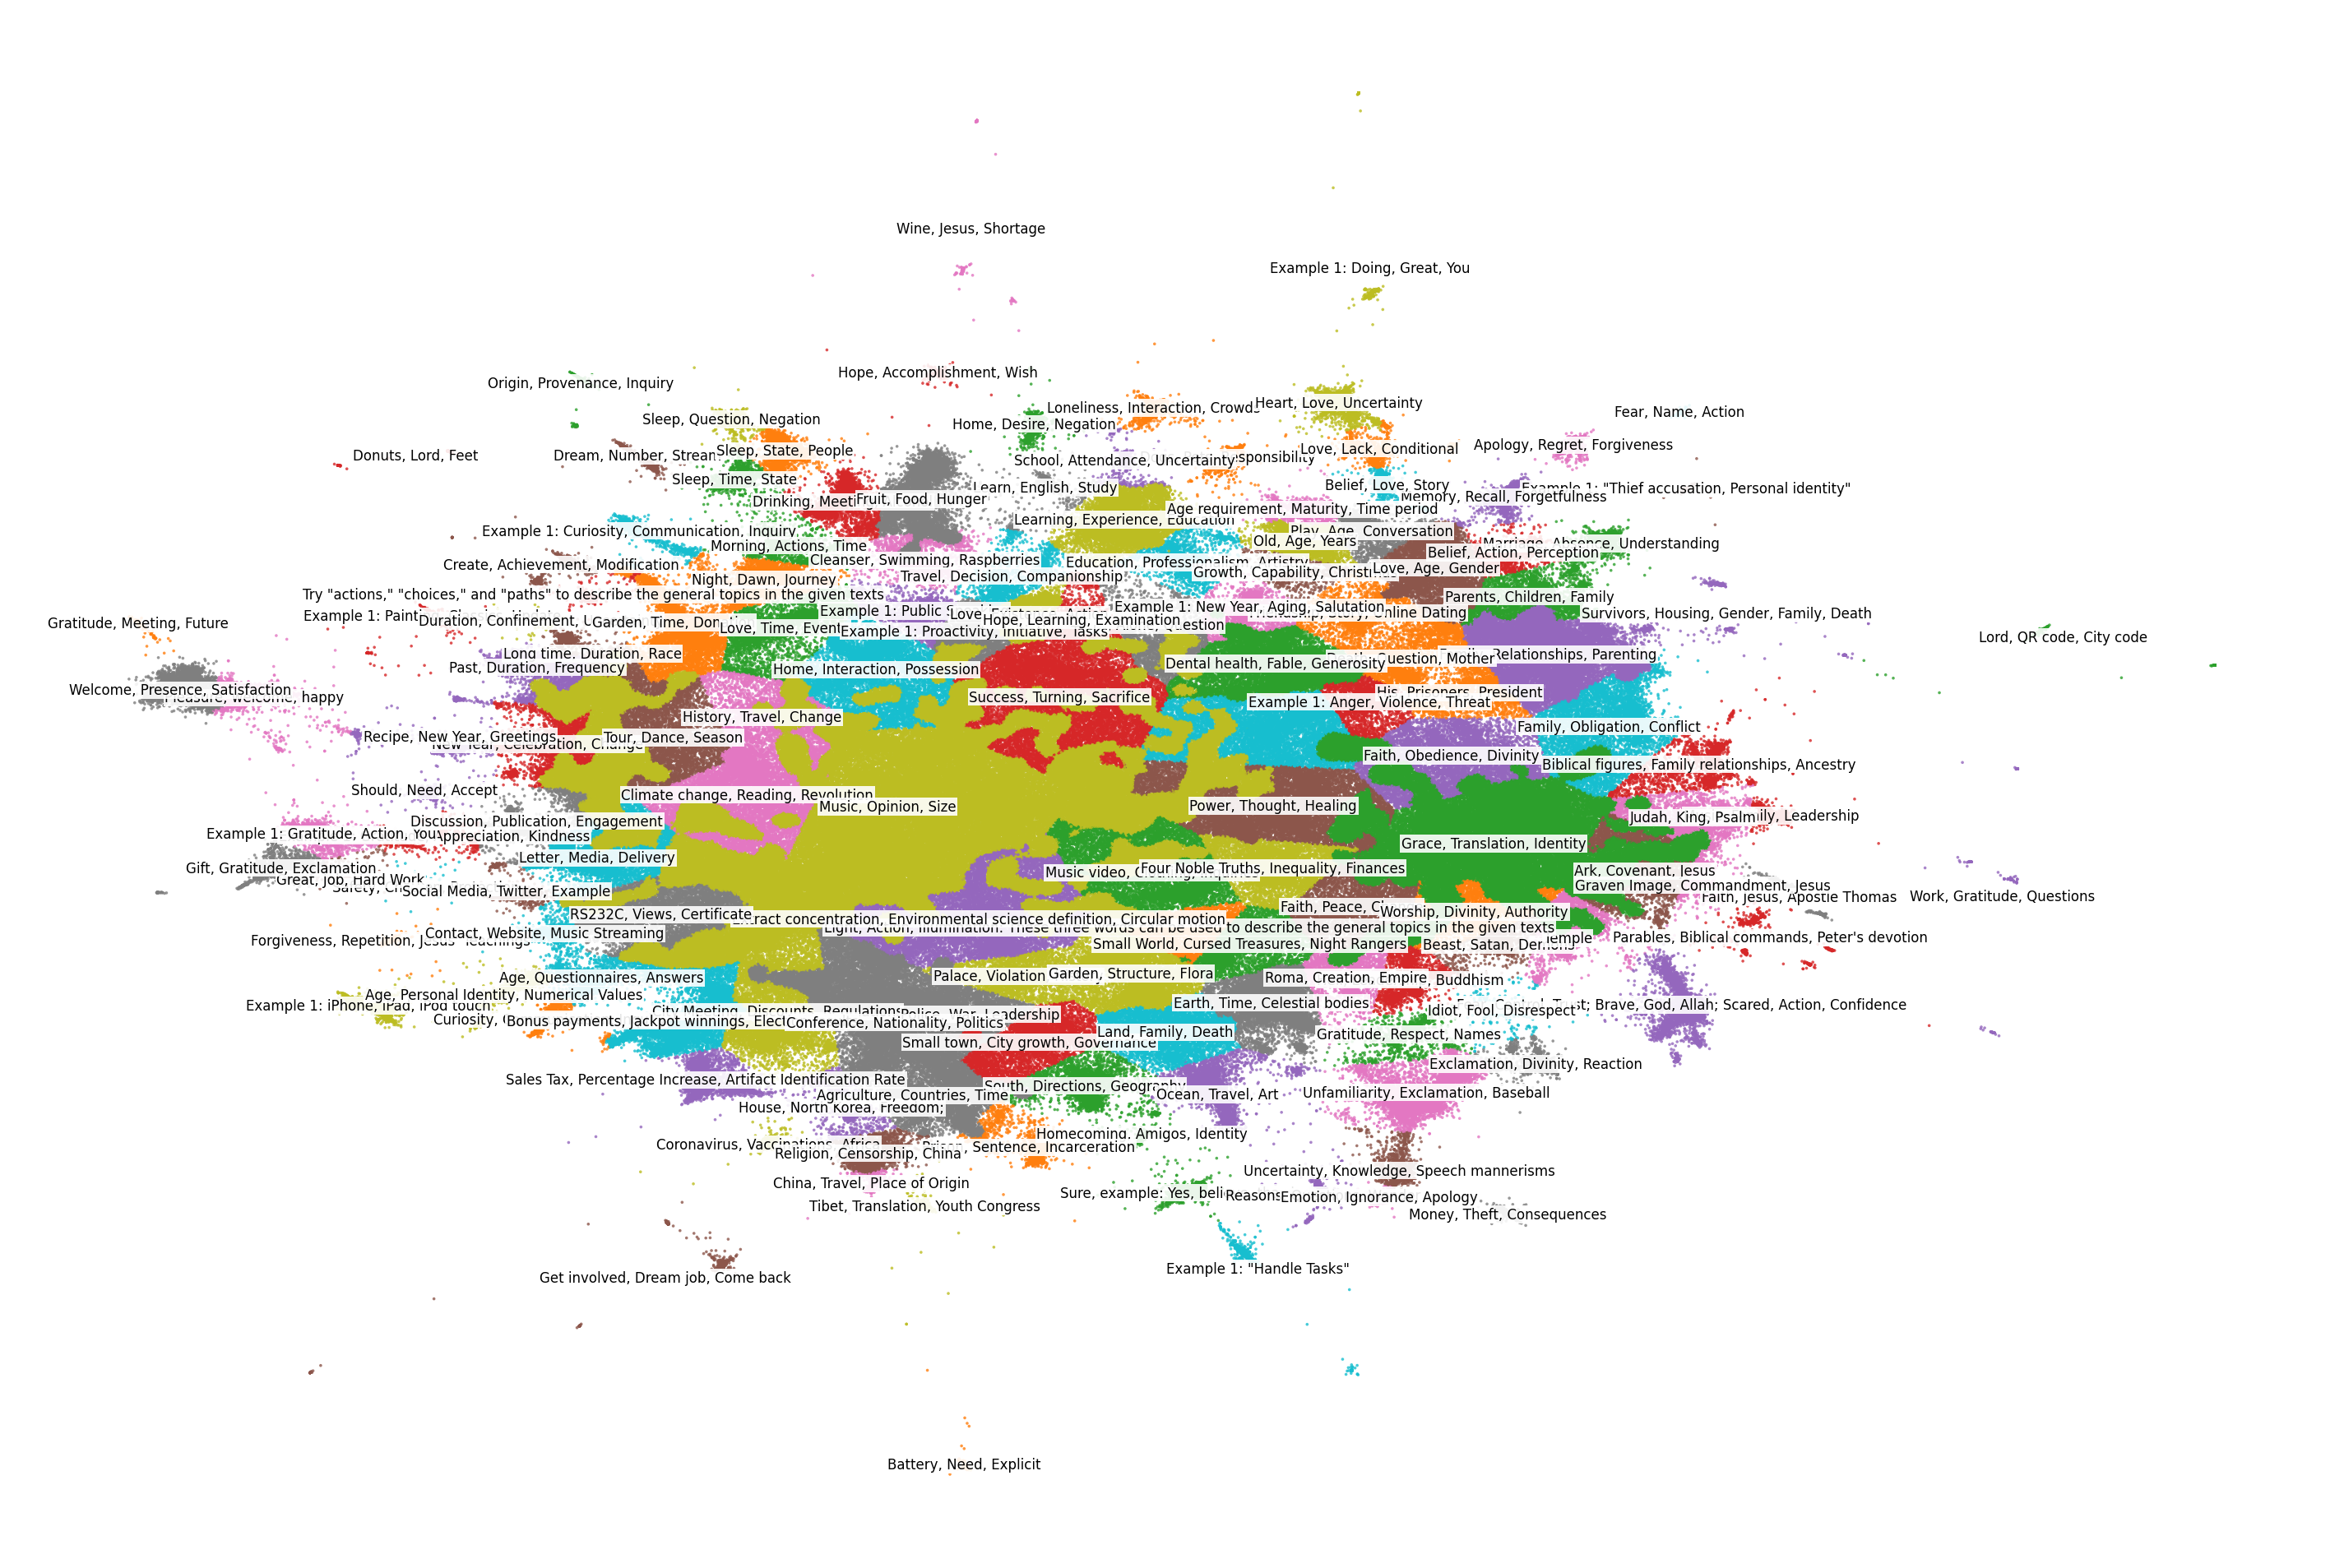

In [47]:
cc.show()

In [50]:
cc.cluster_summaries

{-1: 'None',
 0: 'Battery, Need, Explicit',
 1: 'Lord, QR code, City code',
 2: 'Donuts, Lord, Feet',
 3: 'Work, Gratitude, Questions',
 4: 'Get involved, Dream job, Come back',
 5: 'Wine, Jesus, Shortage',
 6: 'Money, Theft, Consequences',
 7: 'Example 1: Doing, Great, You',
 8: 'Fear, Name, Action',
 9: 'Gratitude, Meeting, Future',
 10: 'Origin, Provenance, Inquiry',
 11: 'Hope, Accomplishment, Wish',
 12: 'Survivors, Housing, Gender, Family, Death',
 13: 'Example 1: "Thief accusation, Personal identity"',
 14: 'Pleasure, welcome, happy',
 15: 'Welcome, Presence, Satisfaction',
 16: 'Example 1: iPhone, iPad, iPod touch',
 17: 'Example 1: "Handle Tasks"',
 18: "Forgiveness, Repetition, Jesus' Teachings",
 19: 'Sure, example: Yes, believe, thawing',
 20: 'Example 1: Painting, Classics, Update',
 21: 'Fear, Control, Trust; Brave, God, Allah; Scared, Action, Confidence',
 22: 'Dream, Number, Stream',
 23: 'Apology, Regret, Forgiveness',
 24: 'Faith, Jesus, Apostle Thomas',
 25: 'Coronav

In [54]:
list(cc.cluster_labels).sort()

In [57]:
cc.cluster_labels

array([129,  65, 142, ...,  21,  91,  51])

In [67]:
summaries = [cc.cluster_summaries[label] if label in cc.cluster_summaries.keys() else 'None' for label in cc.cluster_labels]

In [61]:
full_ds = load_dataset('billingsmoore/NLLB-bo-en', split='train')

In [62]:
full_ds[0]

{'source': 'ཞལ་ཆད་ དང་ ཁས་ལེན་ ཐོབ་ཅེས་ལ་།',
 'target': 'That is your contract with God."'}

In [ ]:
cc.save('nllb-cc')

In [63]:
df = full_ds.to_pandas()
df.head()

source  \
0                     ཞལ་ཆད་ དང་ ཁས་ལེན་ ཐོབ་ཅེས་ལ་།   
1                7-8ཨབ་ར་ཧམ་ལོ་ ༡༧༥ ལོན་ནས་གྲོངས་སོ།   
2  དུ་ང་ཚོ ས ་སྔོ ན ་བྱོ ན ་མཁས་པས་གསུངས་ པའི་དེབ...   
3  ོ ་ཚོ་ཆོས་དད་མེད་མཁན་རེད། ཅེས་ སྦྲགས་འད་ི འདྲ་...   
4  དེ་རྣམས་ཉམས་ལེན་གང་ཟག་རྣམས། ། ལམ་དེ་རྣམས་ལ་འགྲ...   

                                              target  
0                   That is your contract with God."  
1  [ylt] And these the days of the years of the l...  
2  Nothing is known of him, apart from what is in...  
3                  Incredulous, "How can it not be?"  
4  Not just themselves, but those who are (or mig...

In [68]:
df['topic'] = summaries

In [69]:
df.head()

source  \
0                     ཞལ་ཆད་ དང་ ཁས་ལེན་ ཐོབ་ཅེས་ལ་།   
1                7-8ཨབ་ར་ཧམ་ལོ་ ༡༧༥ ལོན་ནས་གྲོངས་སོ།   
2  དུ་ང་ཚོ ས ་སྔོ ན ་བྱོ ན ་མཁས་པས་གསུངས་ པའི་དེབ...   
3  ོ ་ཚོ་ཆོས་དད་མེད་མཁན་རེད། ཅེས་ སྦྲགས་འད་ི འདྲ་...   
4  དེ་རྣམས་ཉམས་ལེན་གང་ཟག་རྣམས། ། ལམ་དེ་རྣམས་ལ་འགྲ...   

                                              target  \
0                   That is your contract with God."   
1  [ylt] And these the days of the years of the l...   
2  Nothing is known of him, apart from what is in...   
3                  Incredulous, "How can it not be?"   
4  Not just themselves, but those who are (or mig...   

                                              topic  
0                        Faith, Obedience, Divinity  
1  Biblical figures, Family relationships, Ancestry  
2                              Music, Opinion, Size  
3                                              None  
4                              Music, Opinion, Size

In [70]:
from datasets import Dataset

labeled_ds = Dataset.from_pandas(df)

In [71]:
labeled_ds[0]

{'source': 'ཞལ་ཆད་ དང་ ཁས་ལེན་ ཐོབ་ཅེས་ལ་།',
 'target': 'That is your contract with God."',
 'topic': 'Faith, Obedience, Divinity'}

In [72]:
labeled_ds.push_to_hub('billingsmoore/NLLB-bo-en')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/715 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/billingsmoore/NLLB-bo-en/commit/4158264183af3db7da8c1b0b96b68350f2d05581', commit_message='Upload dataset', commit_description='', oid='4158264183af3db7da8c1b0b96b68350f2d05581', pr_url=None, pr_revision=None, pr_num=None)